# Topic Model Trends &mdash; TEMPLATE

In this notebook we visualize a previously generated topic model. Use a model that has a time-based label, such as year.

# Set Up

## Imports

In [1]:
import pandas as pd
import numpy as np
from lib import tapi

## Import Topic Data and Configure

We import a previously generated model.

In [2]:
tapi.list_dbs() 

['anphoblacht',
 'jstor_hyperparameter',
 'jstor_hyperparameter_demo',
 'okcupid',
 'tamilnet',
 'winereviews']

In [3]:
data_prefix = 'winereviews'   # INSERT YOUR PREFIX FROM A PREVIOUS OUTPUT

In [4]:
db = tapi.Edition(data_prefix)

In [5]:
db.get_tables()

LABELS
VOCAB
BOW
TOPICS
DTM
THETA
PHI
TOPICS_NMF
THETA_NMF
PHI_NMF


In [6]:
labels = db.get_labels()

In [7]:
labels

,n
label_name,
doc_points,21
doc_label,34
doc_place,936
doc_taster,18
doc_province,238
doc_price,181
doc_title,9935
doc_variety,346


In [8]:
doc_label = 'doc_points' # PICK YOUR LABEL

In [9]:
db.TOPICS.topwords.to_list()

['0 nose, fruit, palate, shows, bottling, aromas, flavors',
 '1 fruit, wine, flavors, stone, stone fruit, aromas, blend',
 '2 ripe, acidity, fruit, wine, bright, flavors, drink',
 '3 wine, drink, acidity, fruits, ripe, tannins, fruit',
 '4 flavors, acidity, wine, finish, peach, lemon, palate',
 '5 wine, fruit, acidity, blanc, flavors, texture, sauvignon blanc',
 '6 palate, cherry, tannins, black, aromas, alongside, offers',
 '7 fruit, flavors, finish, wine, black, fruit flavors, oak',
 '8 wine, tannins, black, plum, flavors, berry, blackberry',
 '9 fruit, aromas, palate, wine, white, finish, red',
 '10 black, flavors, aromas, chocolate, palate, plum, cherry',
 '11 bodied, wine, medium, medium bodied, cherry, flavors, fruit',
 '12 cabernet, sauvignon, cabernet sauvignon, blend, merlot, franc, cabernet franc',
 '13 wine, fruit, oak, cabernet, blend, tannins, black',
 '14 cherry, flavors, wine, pinot, aromas, black, noir',
 '15 apple, palate, finish, citrus, aromas, green, fresh',
 '16 fr

In [10]:
topic_glosses = []

# Show Graphs

In [11]:
if len(topic_glosses) == 0:
    topic_glosses = db.TOPICS.topwords.str.extract(r'^(.{20})')[0].to_list()
db.TOPICS['gloss'] = topic_glosses 

In [12]:
db.THETA['label'] = db.LABELS[doc_label]

In [13]:
TRENDS = db.THETA.groupby('label').mean()
TRENDS.columns = db.TOPICS.gloss

In [14]:
# TRENDS.style.background_gradient()

In [15]:
import matplotlib.pyplot as plt

In [16]:
def show_trend(topic_id, kind='bar', h=3, w=12):
    gloss = db.TOPICS.loc[topic_id, 'gloss']
    TRENDS[gloss].plot(kind=kind, figsize=(w, h), rot=45, 
                       title= gloss.upper() + '\n' + db.TOPICS.loc[topic_id].topwords);

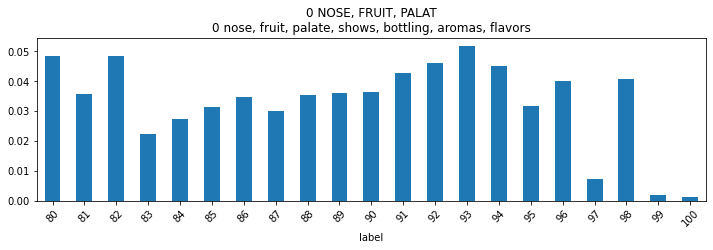

In [17]:
show_trend(0,'bar')

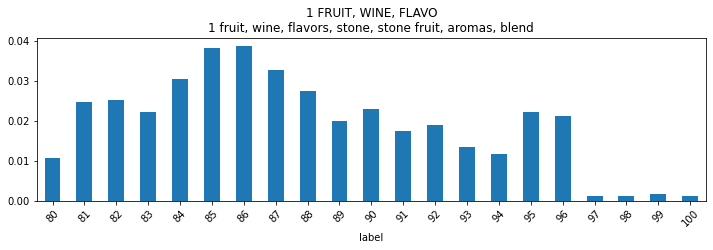

In [27]:
show_trend(1,'bar')

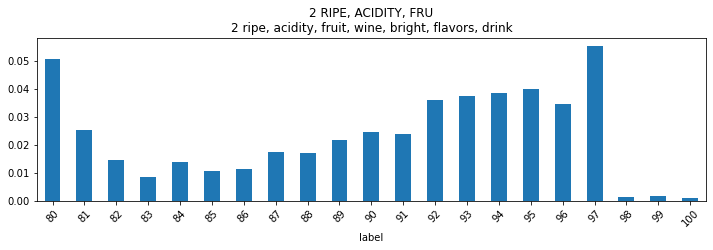

In [28]:
show_trend(2,'bar')

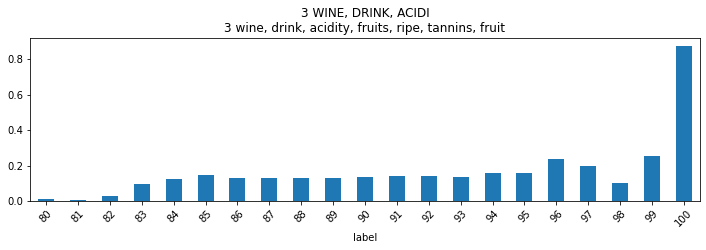

In [29]:
show_trend(3,'bar')

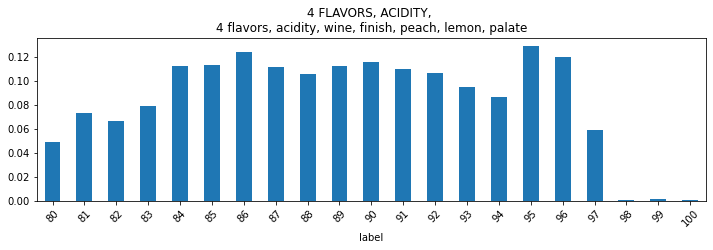

In [30]:
show_trend(4,'bar')

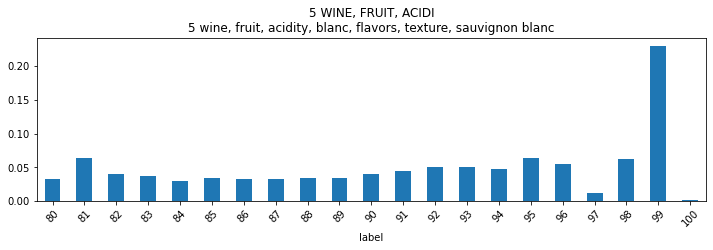

In [31]:
show_trend(5,'bar')

In [33]:
import plotly_express as px

In [34]:
px.bar(TRENDS)